In [21]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Annotated
from langchain_core.messages import BaseMessage,HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver

In [9]:
from langgraph.graph.message import add_messages
class ChatState(TypedDict):
    messages:Annotated[list[BaseMessage],add_messages]

In [13]:
llm=ChatOpenAI()
def chat_node(state:ChatState):
    messages=state['messages']

    response=llm.invoke(messages)

    return{'messages':[response]}


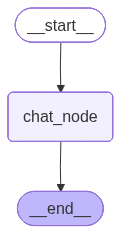

In [22]:
checkpointer=MemorySaver()
graph=StateGraph(ChatState)

graph.add_node('chat_node',chat_node)
graph.add_edge(START,'chat_node')
graph.add_edge('chat_node',END)

chatbot=graph.compile(checkpointer=checkpointer)
chatbot

In [16]:
initial_state={
    'messages':[HumanMessage(content='What is the capital of Nepal?')]

}
chatbot.invoke(initial_state)['messages'][-1].content

'The capital of Nepal is Kathmandu.'

In [23]:
thread_id="1"
while True:
    user_message=input('Type here:')
    print("User: ",user_message)

    if user_message.strip().lower() in['exit','quit','bye']:
        break 
    config={'configurable':{'thread_id':thread_id}}
    response=chatbot.invoke({'messages':[HumanMessage(content=user_message)]},config=config)

    print('AI',response['messages'][-1].content)

User:  hi my name is prajwol
AI Hello Prajwol, nice to meet you! How can I assist you today?
User:  what is my name
AI Your name is Prajwol.
User:  my caste is Lamichhane
AI Got it, Prajwol Lamichhane. How can I assist you today? Feel free to ask any questions or let me know how I can help.
User:  so do you know my full name
AI Yes, based on the information you provided, your full name is Prajwol Lamichhane. If there is anything else you would like to know or discuss, feel free to ask!
User:  would you be my best buddy 
AI As an AI assistant, I am here to help and provide support, so I can be a friendly companion to chat with or assist you with any questions or tasks you have. Feel free to reach out whenever you need assistance or just want to chat!
User:  lets do some math 
AI Sure! I'd be happy to help with math. What kind of math problem would you like assistance with?
User:  10 **300
AI The result of 10 raised to the power of 300 is a very large number, which is a 1 followed by 300

In [24]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='hi my name is prajwol', additional_kwargs={}, response_metadata={}, id='3a52e1de-e9ee-4dc4-a135-ea2319b40445'), AIMessage(content='Hello Prajwol, nice to meet you! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 15, 'total_tokens': 33, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-DDUICWn2qhuzHRGzbd8iMrPjpgKnY', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c99d0-24ac-7a73-bcae-00f6eb112ed7-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 15, 'output_tokens': 18, 'total_tokens': 33, 'input_token_details': {'a